In [1]:
#importing necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [3]:
#Open image and display
original=Image.open(requests.get('https://raw.githubusercontent.com/suryatej118/Pan-card-detector/main/original.jpg',stream=True).raw)
tampered=Image.open(requests.get('https://raw.githubusercontent.com/suryatej118/Pan-card-detector/main/tampered.jpg',stream=True).raw)

In [4]:
#Checking image format
print("Original image format:", original.format)
print("Tampered image format:", tampered.format)

Original image format: JPEG
Tampered image format: JPEG


In [5]:
#image sizes
print("Original image size:", original.size)
print("Tampered image size:", tampered.size)

Original image size: (250, 160)
Tampered image size: (250, 160)


In [6]:
#resizing the images and saving them in a similar format
original=original.resize((250,160))
original.save('pan_card_tampering/image/original.png')
tampered=tampered.resize((250,160))
tampered.save('pan_card_tampering/image/tampered.png')

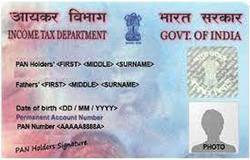

In [7]:
original

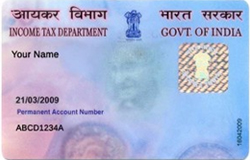

In [8]:
tampered

In [9]:
#Loading images using cv2
original=cv2.imread('pan_card_tampering/image/original.png')
tampered=cv2.imread('pan_card_tampering/image/tampered.png')

In [10]:
#Converting images to grayscale
original_gray=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_gray=cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

In [11]:
#computing SSIM(Structural similarity index)
(score,diff)=structural_similarity(original_gray,tampered_gray,full=True)
diff=(diff*255).astype("uint8")
print("SSIM:{}".format(score))

SSIM:0.2952677730856737


In [12]:
#Calculating thresholds and contours
thresh=cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)

In [13]:
#creating boundary rectangles
#loopm over contours
for c in cnts:
  (x,y,w,h)=cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

Original Format Image


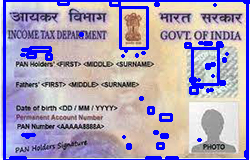

In [14]:
print('Original Format Image')
Image.fromarray(original)

Tampered image


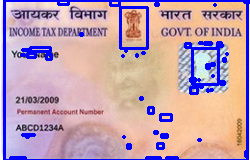

In [15]:
print('Tampered image')
Image.fromarray(tampered)

Difference in image


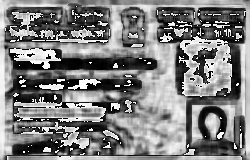

In [16]:
#displaying difference between images with black
print('Difference in image')
Image.fromarray(diff)

Threshold image


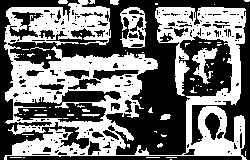

In [18]:
#Display threshhold image with white
print('Threshold image')
Image.fromarray(thresh)